In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import savez
#Purpose:
#Create a Plot to visualize the convergence of the DMFT loop for different values of U

manila = {1: {'folderName': 'U1_manila'}, 2: {'folderName': 'U2_manila'}, 3: {'folderName': 'U3_manila'}, 4: {'folderName': 'U4_manila'}, 5: {
    'folderName': 'U5_manila'}, 5.5: {'folderName': None}, 6.5: {'folderName': 'U65_manila'}, 7: {'folderName': 'U7_manila'}, 8: {'folderName': 'U8_manila'}}
qasm = {1: {'folderName': None}, 2: {'folderName': 'U2_qasm'}, 3: {'folderName': 'U3_qasm'}, 4: {'folderName': 'U4_qasm'}, 5: {
    'folderName': 'U5_qasm'}, 5.5: {'folderName': None}, 6.5: {'folderName': 'U65_qasm_truncated'}, 7: {'folderName': 'U7_qasm'}, 8: {'folderName': 'U8_qasm'}}
#Create a Dictionary of the results files
print(os.getcwd())

os.chdir('..//data')
print(os.getcwd())
for contents in manila.values():
    if contents['folderName'] is None:
        continue
    else:
        os.chdir(contents['folderName'])
        for file in os.listdir():
            if file.endswith('.npz'):
                contents['V_List'] = np.load(file)['V_list']
                print(np.load(file).files)
                contents['U'] = np.load(file)['Uval']
                print(np.load(file)['Uval'])
        os.chdir('../')

for contents in qasm.values():
    if contents['folderName'] is None:
        continue
    else:
        os.chdir(contents['folderName'])
        for file in os.listdir():
            if file.endswith('.npz'):
                contents['V_List'] = np.load(file)['V_list']
                print(np.load(file).files)
                contents['U'] = np.load(file)['Uval']
                print(np.load(file)['Uval'])
        os.chdir('../')
os.chdir('../')
print(os.getcwd())


color1 = '#840F9C'
color2 = '#498AD8'
color3 = '#EC921B'


c:\Users\Thoma\OneDrive\Documents\2021_ORNL\paper_code\figures
c:\Users\Thoma\OneDrive\Documents\2021_ORNL\paper_code\data
['V_list', 'attempt_list', 'Uval', 'frequencies', 'circuitLengths']
1
['V_list', 'attempt_list', 'Uval', 'frequencies', 'circuitLengths']
2
['V_list', 'attempt_list', 'Uval', 'frequencies', 'circuitLengths']
3
['V_list', 'attempt_list', 'Uval', 'frequencies', 'circuitLengths']
4
['V_list', 'attempt_list', 'Uval', 'frequencies', 'circuitLengths']
5
['V_list', 'attempt_list', 'Uval', 'frequencies', 'circuitLengths']
6.5
['V_list', 'attempt_list', 'Uval', 'frequencies', 'circuitLengths']
7
['V_list', 'attempt_list', 'Uval', 'frequencies', 'circuitLengths']
8
['V_list', 'attempt_list', 'Uval', 'frequencies', 'circuitLengths']
2
['V_list', 'attempt_list', 'Uval', 'frequencies', 'circuitLengths']
3
['V_list', 'attempt_list', 'Uval', 'frequencies', 'circuitLengths']
4
['V_list', 'attempt_list', 'Uval', 'frequencies', 'circuitLengths']
5
['V_list', 'attempt_list', 'Uval', 

In [4]:
def ExactIterations(V_initial, Uval):
    v_list = []
    for Vstart in V_initial:
        omega1 = 0.25*(np.sqrt(Uval**2 + 64*Vstart**2) - np.sqrt(Uval**2 + 16*Vstart**2))
        omega2 = 0.25*(np.sqrt(Uval**2 + 64*Vstart**2) + np.sqrt(Uval**2 + 16*Vstart**2))
        Z_expected = (omega1**2)*(omega2**2)/(Vstart**2*(omega1**2 + omega2**2 - Vstart**2))
        v_list.append(np.sqrt(Z_expected))
    return v_list


def actualZ(Uval):
    mask = (36-np.square(Uval))/36 > 0
    return (36-np.square(Uval))/36 * mask
from matplotlib import rc
rc('font',**{'size':20,})
rc('font',**{'family':'serif','serif':['CMU Serif']})

from matplotlib import figure
from matplotlib.gridspec import GridSpec

[0.5        0.68098074 0.81044357 0.78577858 0.86139148 0.88310412]
3


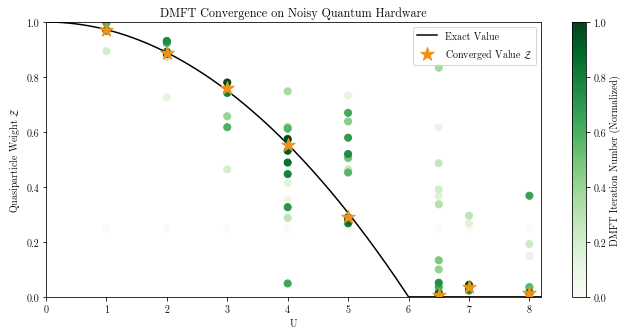

In [6]:
%matplotlib inline
print(manila[3]['V_List'])
print(manila[3]['U'])
fig, ax = plt.subplots()
cm = plt.cm.get_cmap('Greens')#.reversed()
cm2 = plt.cm.get_cmap('Purples')
U_list = []
V_converged = []
U_listQ = []
V_convergedQ = []
Exact_U = np.linspace(0, 10, 1000)
plt.plot(Exact_U, actualZ(Exact_U), c='k', label='Exact Value', zorder=-1)

"""for contents in qasm.values():
    if contents['folderName'] is None:
        continue
    else:
        V_ListQ = np.square(contents['V_List'])
        V_convergedQ.append((V_ListQ[-1] + V_ListQ[-2])/2)
        U = contents['U']
        U_listQ.append(U)
        U_tup = (U,)*len(V_ListQ)
        p = ax.scatter(U_tup, V_ListQ, c=np.linspace(0,1,len(V_ListQ)), cmap=cm2, s=50)"""
for contents in manila.values():
    if contents['folderName'] is None:
        continue
    else:
        V_List = np.square(contents['V_List'])
   
        V_converged.append((V_List[-1] + V_List[-2])/2)
        U = contents['U']
        U_list.append(U)
        U_tup = (U,)*len(V_List)
        p = ax.scatter(U_tup, V_List, c=np.linspace(0,1,len(V_List)), cmap=cm, s=50)

ax.set_xlabel('U')
ax.set_ylabel(r'Quasiparticle Weight $\mathcal{Z}$')
def actualZ(U):
    U = np.minimum(U,6)
    return((36 - np.square(U))/36)
#ax.scatter(U_listQ, V_convergedQ, c='orange', s=100 ,marker='*', label=r'Converged Value $\mathcal{Z}$ on QASM')
ax.set_title('DMFT Convergence on Noisy Quantum Hardware')
ax.scatter(U_list, V_converged, c=color3, s=200 ,marker='*', label=r'Converged Value $\mathcal{Z}$')
ax.set_ylim(0,1)
Exact_U = np.linspace(U_list[0], U_list[-1], 100,endpoint=True)
ax.legend()
ax.set_xlim(0, 8.2)


fig.colorbar(p, label='DMFT Iteration Number (Normalized)')
fig.tight_layout()
fig.set_size_inches(10, 5)
fig.savefig('..//figures//Figure_6.pdf', dpi=600)
fig.savefig('..//figures//Figure_6.png', dpi=600)


In [ ]:
%matplotlib inline
print(manila[3]['V_List'])
print(manila[3]['U'])
cm = plt.cm.get_cmap('Blues')
cm2 = plt.cm.get_cmap('Purples')
U_list = []
V_converged = []
U_listQ = []
V_convergedQ = []
"""for contents in qasm.values():
    if contents['folderName'] is None:
        continue
    else:
        V_ListQ = np.square(contents['V_List'])
        V_convergedQ.append((V_ListQ[-1] + V_ListQ[-2])/2)
        U = contents['U']
        U_listQ.append(U)
        U_tup = (U,)*len(V_ListQ)
        p = ax.scatter(U_tup, V_ListQ, c=np.linspace(0,1,len(V_ListQ)), cmap=cm2, s=50)"""
for contents in manila.values():
    if contents['folderName'] is None:
        continue
    else:
        V_List = np.square(contents['V_List'])
   
        V_converged.append((V_List[-1] + V_List[-2])/2)
        U = contents['U']
        U_list.append(U)
        U_tup = (U,)*len(V_List)
        p = ax_main.scatter(U_tup, V_List, c=np.linspace(0,1,len(V_List)), cmap=cm, s=50)

ax_main.set_xlabel('U')
ax_main.set_ylabel(r'Quasiparticle Weight $\mathcal{Z}$')
def actualZ(U):
    U = np.minimum(U,6)
    return((36 - np.square(U))/36)
#ax.scatter(U_listQ, V_convergedQ, c='orange', s=100 ,marker='*', label=r'Converged Value $\mathcal{Z}$ on QASM')
ax_main.set_title('DMFT Convergence on Noisy Quantum Hardware')
ax_main.scatter(U_list, V_converged, c='orange', s=100 ,marker='*', label=r'Converged Value $\mathcal{Z}$')
ax_main.set_ylim(0,1)
Exact_U = np.linspace(U_list[0], U_list[-1], 100,endpoint=True)
ax_main.plot(Exact_U, actualZ(Exact_U), c='k', label='Exact Value')
ax_main.legend()


fig_combined.colorbar(p, label='DMFT Step Number (Normalized)', orientation='horizontal')

#fig_combined.savefig('../../deliverables/paper/Figure_5_testing.png', dpi=300)

[0.5        0.68098074 0.81044357 0.78577858 0.86139148 0.88310412]
3


[0.5        0.68098074 0.81044357 0.78577858 0.86139148 0.88310412]
3


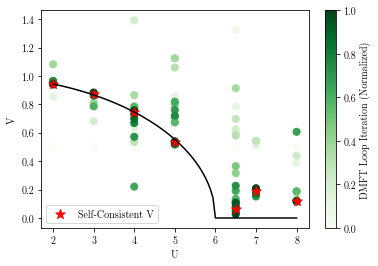

In [ ]:
print(manila[3]['V_List'])
print(manila[3]['U'])
fig, ax = plt.subplots()
cm = plt.cm.get_cmap('Greens')
U_list = []
V_converged = []
for contents in manila.values():
    if contents['folderName'] is None:
        continue
    else:
        V_List = contents['V_List']
        V_converged.append((V_List[-1] + V_List[-2])/2)
        U = contents['U']
        U_list.append(U)
        U_tup = (U,)*len(V_List)
        p = ax.scatter(U_tup, V_List, c=np.linspace(0,1,len(V_List)), cmap=cm, s=50)
ax.set_xlabel('U')
ax.set_ylabel('V')
def actualV(U):
    U = np.minimum(U,6)
    return(np.sqrt(36 - np.square(U))/6)
ax.scatter(U_list, V_converged, c='r', s=100 ,marker='*', label=r'Self-Consistent V')
ax.legend()
Exact_U = np.linspace(U_list[0], U_list[-1], 100,endpoint=True)
plt.plot(Exact_U, actualV(Exact_U), c='k', label='')
fig.colorbar(p, label='DMFT Loop Iteration (Normalized)')

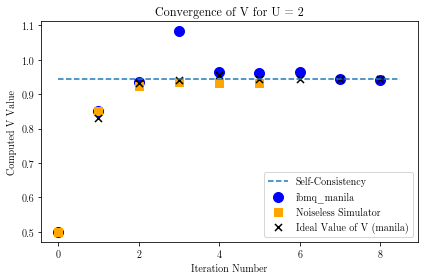

In [ ]:
#Plotting the Converged of U = 4 for Noisy system vs. QASM
U_number = 2
plt.close()
fig, ax = plt.subplots()
ax.set_xlabel('Iteration Number')
ax.set_ylabel('Computed V Value')
ax.set_title('Convergence of V for U = ' + str(U_number))
U4_V_list_qasm = qasm[U_number]['V_List']
U4_V_list_manila = manila[U_number]['V_List']
#ax.fill_between( np.linspace(0, len(U4_V_list_manila)-0.5, 100, endpoint=True), actualV(U_number)-0.02, actualV(U_number)+0.02, alpha=0.5, label='Tolerance')
ax.hlines(actualV(U_number), 0, len(U4_V_list_manila)-0.5, linestyles='dashed', label='Self-Consistency')

ax.scatter(range(len(U4_V_list_manila)), U4_V_list_manila, s =100,c='b', label='ibmq_manila')

ax.scatter(range(len(U4_V_list_qasm)), U4_V_list_qasm, s=50,c='orange',label='Noiseless Simulator', marker='s')
ax.scatter(range(1,len(U4_V_list_manila)), ExactIterations(U4_V_list_manila[:-1], U_number), s =50,c='k', marker='x', label='Ideal Value of V (manila)')
#ax.scatter(range(1,len(U4_V_list_qasm)+1), ExactIterations(U4_V_list_qasm, U_number), s =50,c='orange', marker='x', label='Ideal Value of V (qasm)')
fig.tight_layout()
ax.legend()
plt.show()
fig.set_size_inches(6, 4)
fig.savefig('../../deliverables/paper/U={}.pdf'.format(U_number), dpi=300)
fig.savefig('../../deliverables/paper/U={}.png'.format(U_number), dpi=300)



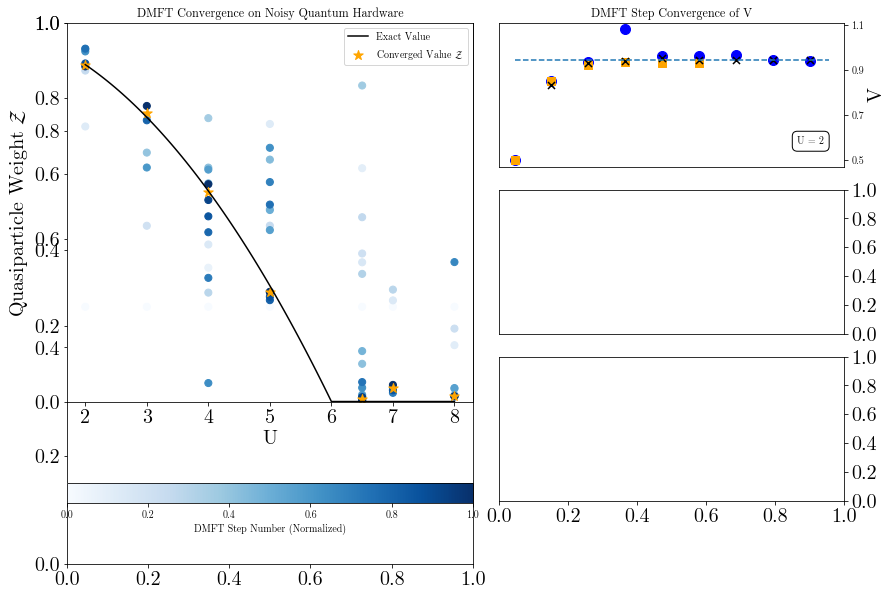

In [ ]:
#Plotting the Converged of U = 4 for Noisy system vs. QASM
U_number = 2
ax_2.clear()
ax_2.yaxis.set_label_position("right")
ax_2.set_ylabel('V')
ax_2.set_yticks([0.5, 0.7, 0.9, 1.1])

ax_2.set_title('DMFT Step Convergence of V')
U4_V_list_qasm = qasm[U_number]['V_List']
U4_V_list_manila = manila[U_number]['V_List']
#ax.fill_between( np.linspace(0, len(U4_V_list_manila)-0.5, 100, endpoint=True), actualV(U_number)-0.02, actualV(U_number)+0.02, alpha=0.5, label='Tolerance')
ax_2.hlines(actualV(U_number), 0, len(U4_V_list_manila)-0.5, linestyles='dashed')

ax_2.scatter(range(len(U4_V_list_manila)), U4_V_list_manila, s =100,c='b')

ax_2.scatter(range(len(U4_V_list_qasm)), U4_V_list_qasm, s=50,c='orange', marker='s')
ax_2.scatter(range(1,len(U4_V_list_manila)), ExactIterations(U4_V_list_manila[:-1], U_number), s =50,c='k', marker='x')
ax_2.annotate('U = 2', (0.9 * (len(U4_V_list_manila)-0.5), 0.57), 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))
#ax.scatter(range(1,len(U4_V_list_qasm)+1), ExactIterations(U4_V_list_qasm, U_number), s =50,c='orange', marker='x', label='Ideal Value of V (qasm)')
#ax_2.legend()
ax_2.yaxis.tick_right()

#fig_combined.savefig('../../deliverables/paper/Figure_5_testing.png', dpi=300)
fig_combined


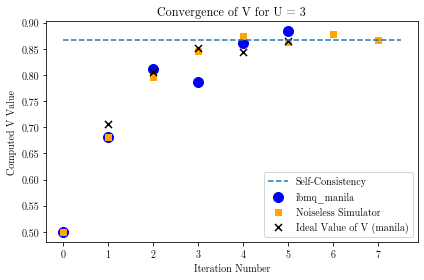

In [ ]:
#Plotting the Converged of U = 4 for Noisy system vs. QASM
U_number = 3
plt.close()
fig, ax = plt.subplots()
ax.set_xlabel('Iteration Number')
ax.set_ylabel('Computed V Value')
ax.set_title('Convergence of V for U = ' + str(U_number))
U4_V_list_qasm = qasm[U_number]['V_List']
U4_V_list_manila = manila[U_number]['V_List']
#ax.fill_between( np.linspace(0, len(U4_V_list_manila)-0.5, 100, endpoint=True), actualV(U_number)-0.02, actualV(U_number)+0.02, alpha=0.5, label='Tolerance')
ax.hlines(actualV(U_number), 0, len(U4_V_list_qasm)-0.5, linestyles='dashed', label='Self-Consistency')

ax.scatter(range(len(U4_V_list_manila)), U4_V_list_manila, s =100,c='b', label='ibmq_manila')

ax.scatter(range(len(U4_V_list_qasm)), U4_V_list_qasm, s=30,c='orange',label='Noiseless Simulator', marker='s')
ax.scatter(range(1,len(U4_V_list_manila)), ExactIterations(U4_V_list_manila[:-1], U_number), s =50,c='k', marker='x', label='Ideal Value of V (manila)')
#ax.scatter(range(1,len(U4_V_list_qasm)+1), ExactIterations(U4_V_list_qasm, U_number), s =50,c='orange', marker='x', label='Ideal Value of V (qasm)')

fig.tight_layout()
ax.legend()
plt.show()
fig.set_size_inches(6, 4)
fig.savefig('../../deliverables/paper/U={}.pdf'.format(U_number), dpi=300)
fig.savefig('../../deliverables/paper/U={}.png'.format(U_number), dpi=300)



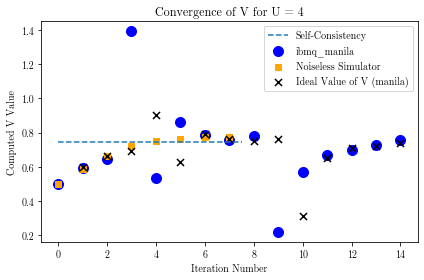

In [ ]:
#Plotting the Converged of U = 4 for Noisy system vs. QASM
U_number = 4
plt.close()
fig, ax = plt.subplots()
ax.set_xlabel('Iteration Number')
ax.set_ylabel('Computed V Value')
ax.set_title('Convergence of V for U = ' + str(U_number))
U4_V_list_qasm = qasm[U_number]['V_List']
U4_V_list_manila = manila[U_number]['V_List']
#ax.fill_between( np.linspace(0, len(U4_V_list_manila)-0.5, 100, endpoint=True), actualV(U_number)-0.02, actualV(U_number)+0.02, alpha=0.5, label='Tolerance')
ax.hlines(actualV(U_number), 0, len(U4_V_list_qasm)-0.5, linestyles='dashed', label='Self-Consistency')

ax.scatter(range(len(U4_V_list_manila)), U4_V_list_manila, s =100,c='b', label='ibmq_manila')

ax.scatter(range(len(U4_V_list_qasm)), U4_V_list_qasm, s=30,c='orange',label='Noiseless Simulator', marker='s')
ax.scatter(range(1,len(U4_V_list_manila)), ExactIterations(U4_V_list_manila[:-1], U_number), s =50,c='k', marker='x', label='Ideal Value of V (manila)')
#ax.scatter(range(1,len(U4_V_list_qasm)+1), ExactIterations(U4_V_list_qasm, U_number), s =50,c='orange', marker='x', label='Ideal Value of V (qasm)')

fig.tight_layout()
ax.legend()
plt.show()
fig.set_size_inches(6, 4)
fig.savefig('../../deliverables/paper/U={}.pdf'.format(U_number), dpi=300)
fig.savefig('../../deliverables/paper/U={}.png'.format(U_number), dpi=300)



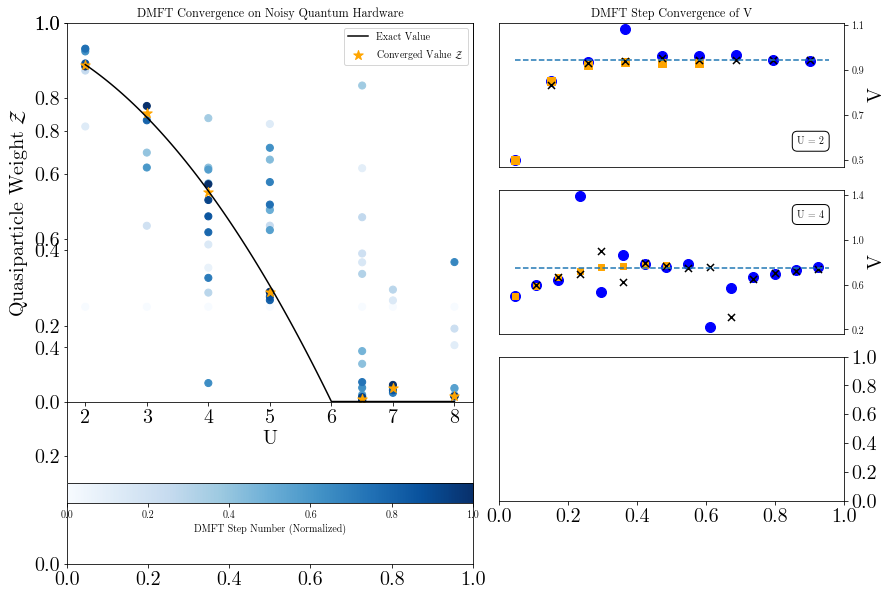

In [ ]:
#Plotting the Converged of U = 4 for Noisy system vs. QASM
U_number = 4
ax_4.clear()
ax_4.yaxis.set_label_position("right")
ax_4.set_yticks([0.2, 0.6, 1, 1.4])

ax_4.set_ylabel('V')
U4_V_list_qasm = qasm[U_number]['V_List']
U4_V_list_manila = manila[U_number]['V_List']
#ax.fill_between( np.linspace(0, len(U4_V_list_manila)-0.5, 100, endpoint=True), actualV(U_number)-0.02, actualV(U_number)+0.02, alpha=0.5, label='Tolerance')
ax_4.hlines(actualV(U_number), 0, len(U4_V_list_manila)-0.5, linestyles='dashed', label='Self-Consistency')

ax_4.scatter(range(len(U4_V_list_manila)), U4_V_list_manila, s =100,c='b', label='ibmq_manila')
ax_4.annotate('U = 4', (0.9 * (len(U4_V_list_manila)-0.5), 1.2), 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))
ax_4.scatter(range(len(U4_V_list_qasm)), U4_V_list_qasm, s=30,c='orange',label='Noiseless Simulator', marker='s')
ax_4.scatter(range(1,len(U4_V_list_manila)), ExactIterations(U4_V_list_manila[:-1], U_number), s =50,c='k', marker='x', label='Ideal Value of V (manila)')
#ax.scatter(range(1,len(U4_V_list_qasm)+1), ExactIterations(U4_V_list_qasm, U_number), s =50,c='orange', marker='x', label='Ideal Value of V (qasm)')

#fig_combined.savefig('../../deliverables/paper/Figure_5_testing.png', dpi=300)
fig_combined


0.5527707983925666
0.5371241840153705


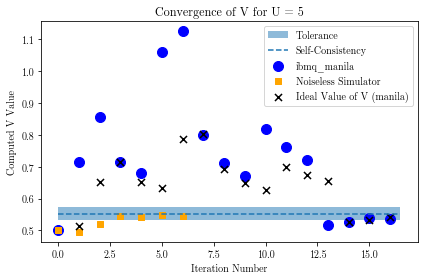

In [ ]:
#Plotting the Converged of U = 4 for Noisy system vs. QASM
U_number = 5
plt.close()
fig, ax = plt.subplots()
ax.set_xlabel('Iteration Number')
ax.set_ylabel('Computed V Value')
ax.set_title('Convergence of V for U = ' + str(U_number))
U4_V_list_qasm = qasm[U_number]['V_List']
U4_V_list_manila = manila[U_number]['V_List']
ax.fill_between( np.linspace(0, len(U4_V_list_manila)-0.5, 100, endpoint=True), actualV(U_number)-0.02, actualV(U_number)+0.02, alpha=0.5, label='Tolerance')
ax.hlines(actualV(U_number), 0, len(U4_V_list_manila)-0.5, linestyles='dashed', label='Self-Consistency')
print(actualV(U_number))
print(U4_V_list_manila[-1])
ax.scatter(range(len(U4_V_list_manila)), U4_V_list_manila, s =100,c='b', label='ibmq_manila')

ax.scatter(range(len(U4_V_list_qasm)), U4_V_list_qasm, s=30,c='orange',label='Noiseless Simulator', marker='s')
ax.scatter(range(1,len(U4_V_list_manila)), ExactIterations(U4_V_list_manila[:-1], U_number), s =50,c='k', marker='x', label='Ideal Value of V (manila)')
#ax.scatter(range(1,len(U4_V_list_qasm)+1), ExactIterations(U4_V_list_qasm, U_number), s =50,c='orange', marker='x', label='Ideal Value of V (qasm)')
fig.tight_layout()
ax.legend()
plt.show()
fig.set_size_inches(6, 4)
fig.savefig('../../deliverables/paper/U={}.pdf'.format(U_number), dpi=300)
fig.savefig('../../deliverables/paper/U={}.png'.format(U_number), dpi=300)



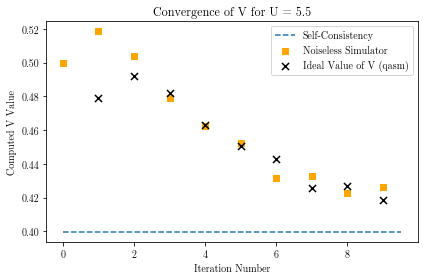

In [ ]:
#Plotting the Converged of U = 4 for Noisy system vs. QASM
U_number = 5.5
plt.close()
fig, ax = plt.subplots()
ax.set_xlabel('Iteration Number')
ax.set_ylabel('Computed V Value')
ax.set_title('Convergence of V for U = ' + str(U_number))
U4_V_list_qasm = qasm[U_number]['V_List']
#U4_V_list_manila = manila[U_number]['V_List']
#ax.fill_between( np.linspace(0, len(U4_V_list_manila)-0.5, 100, endpoint=True), actualV(U_number)-0.02, actualV(U_number)+0.02, alpha=0.5, label='Tolerance')
ax.hlines(actualV(U_number), 0, len(U4_V_list_qasm)-0.5, linestyles='dashed', label='Self-Consistency')

#ax.scatter(range(len(U4_V_list_manila)), U4_V_list_manila, s =100,c='g', label='ibmq_manila')

ax.scatter(range(len(U4_V_list_qasm)), U4_V_list_qasm, s=30,c='orange',label='Noiseless Simulator', marker='s')
#ax.scatter(range(1,len(U4_V_list_manila)), ExactIterations(U4_V_list_manila[:-1], U_number), s =50,c='k', marker='x', label='Ideal Value of V (manila)')
ax.scatter(range(1,len(U4_V_list_qasm)), ExactIterations(U4_V_list_qasm[:-1], U_number), s =50,c='k', marker='x', label='Ideal Value of V (qasm)')

fig.tight_layout()
ax.legend()
plt.show()
fig.set_size_inches(6, 4)
fig.savefig('../../deliverables/paper/U={}.pdf'.format(U_number), dpi=300)
fig.savefig('../../deliverables/paper/U={}.png'.format(U_number), dpi=300)



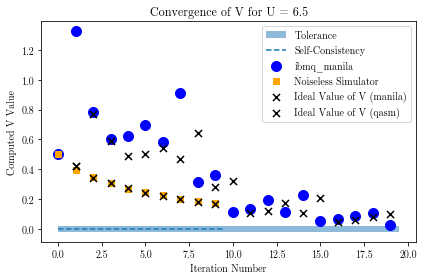

In [ ]:
#Plotting the Converged of U = 4 for Noisy system vs. QASM
U_number = 6.5
plt.close()
fig, ax = plt.subplots()
ax.set_xlabel('Iteration Number')
ax.set_ylabel('Computed V Value')
ax.set_title('Convergence of V for U = ' + str(U_number))
U4_V_list_qasm = qasm[U_number]['V_List']
U4_V_list_manila = manila[U_number]['V_List']
ax.fill_between( np.linspace(0, len(U4_V_list_manila)-0.5, 100, endpoint=True), actualV(U_number)-0.02, actualV(U_number)+0.02, alpha=0.5, label='Tolerance')
ax.hlines(actualV(U_number), 0, len(U4_V_list_qasm)-0.5, linestyles='dashed', label='Self-Consistency')

ax.scatter(range(len(U4_V_list_manila)), U4_V_list_manila, s =100,c='b', label='ibmq_manila')

ax.scatter(range(len(U4_V_list_qasm)), U4_V_list_qasm, s=30,c='orange',label='Noiseless Simulator', marker='s')
ax.scatter(range(1,len(U4_V_list_manila)), ExactIterations(U4_V_list_manila[:-1], U_number), s =50,c='k', marker='x', label='Ideal Value of V (manila)')
ax.scatter(range(1,len(U4_V_list_qasm)), ExactIterations(U4_V_list_qasm[:-1], U_number), s =50,c='k', marker='x', label='Ideal Value of V (qasm)')
fig.tight_layout()
ax.legend()
plt.show()

fig.set_size_inches(6, 4)
fig.savefig('../../deliverables/paper/U={}.pdf'.format(U_number), dpi=300)
fig.savefig('../../deliverables/paper/U={}.png'.format(U_number), dpi=300)



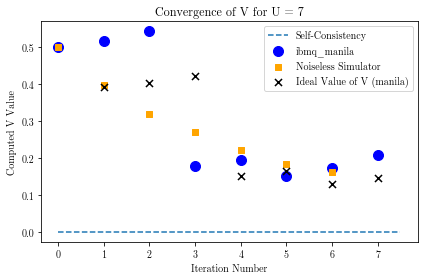

In [ ]:
#Plotting the Converged of U = 4 for Noisy system vs. QASM
U_number = 7
plt.close()
fig, ax = plt.subplots()
ax.set_xlabel('Iteration Number')
ax.set_ylabel('Computed V Value')
ax.set_title('Convergence of V for U = ' + str(U_number))
U4_V_list_qasm = qasm[U_number]['V_List']
U4_V_list_manila = manila[U_number]['V_List']
#ax.fill_between( np.linspace(0, len(U4_V_list_manila)-0.5, 100, endpoint=True), actualV(U_number)-0.02, actualV(U_number)+0.02, alpha=0.5, label='Tolerance')
ax.hlines(actualV(U_number), 0, len(U4_V_list_manila)-0.5, linestyles='dashed', label='Self-Consistency')

ax.scatter(range(len(U4_V_list_manila)), U4_V_list_manila, s =100,c='b', label='ibmq_manila')

ax.scatter(range(len(U4_V_list_qasm)), U4_V_list_qasm, s=30,c='orange',label='Noiseless Simulator', marker='s')
ax.scatter(range(1,len(U4_V_list_manila)), ExactIterations(U4_V_list_manila[:-1], U_number), s =50,c='k', marker='x', label='Ideal Value of V (manila)')
#ax.scatter(range(1,len(U4_V_list_qasm)+1), ExactIterations(U4_V_list_qasm, U_number), s =50,c='k', marker='x', label='Ideal Value of V (qasm)')
fig.tight_layout()
ax.legend()
plt.show()
fig.set_size_inches(6, 4)
fig.savefig('../../deliverables/paper/U={}.pdf'.format(U_number), dpi=300)
fig.savefig('../../deliverables/paper/U={}.png'.format(U_number), dpi=300)



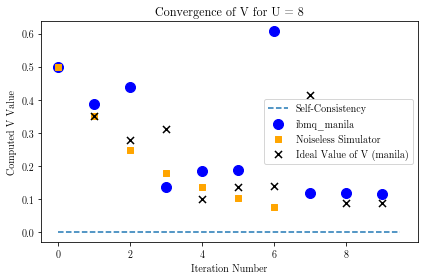

In [ ]:
#Plotting the Converged of U = 4 for Noisy system vs. QASM
U_number = 8
plt.close()
fig, ax = plt.subplots()
ax.set_xlabel('Iteration Number')
ax.set_ylabel('Computed V Value')
ax.set_title('Convergence of V for U = ' + str(U_number))
U4_V_list_qasm = qasm[U_number]['V_List']
U4_V_list_manila = manila[U_number]['V_List']
#ax.fill_between( np.linspace(0, len(U4_V_list_manila)-0.5, 100, endpoint=True), actualV(U_number)-0.02, actualV(U_number)+0.02, alpha=0.5, label='Tolerance')
ax.hlines(actualV(U_number), 0, len(U4_V_list_manila)-0.5, linestyles='dashed', label='Self-Consistency')

ax.scatter(range(len(U4_V_list_manila)), U4_V_list_manila, s =100,c='b', label='ibmq_manila')

ax.scatter(range(len(U4_V_list_qasm)), U4_V_list_qasm, s=30,c='orange',label='Noiseless Simulator', marker='s')
ax.scatter(range(1,len(U4_V_list_manila)), ExactIterations(U4_V_list_manila[:-1], U_number), s =50,c='k', marker='x', label='Ideal Value of V (manila)')
#ax.scatter(range(1,len(U4_V_list_qasm)+1), ExactIterations(U4_V_list_qasm, U_number), s =50,c='orange', marker='x', label='Ideal Value of V (qasm)')
fig.tight_layout()
ax.legend()
plt.show()

fig.set_size_inches(6, 4)
fig.savefig('../../deliverables/paper/U={}.pdf'.format(U_number), dpi=300)
fig.savefig('../../deliverables/paper/U={}.png'.format(U_number), dpi=300)



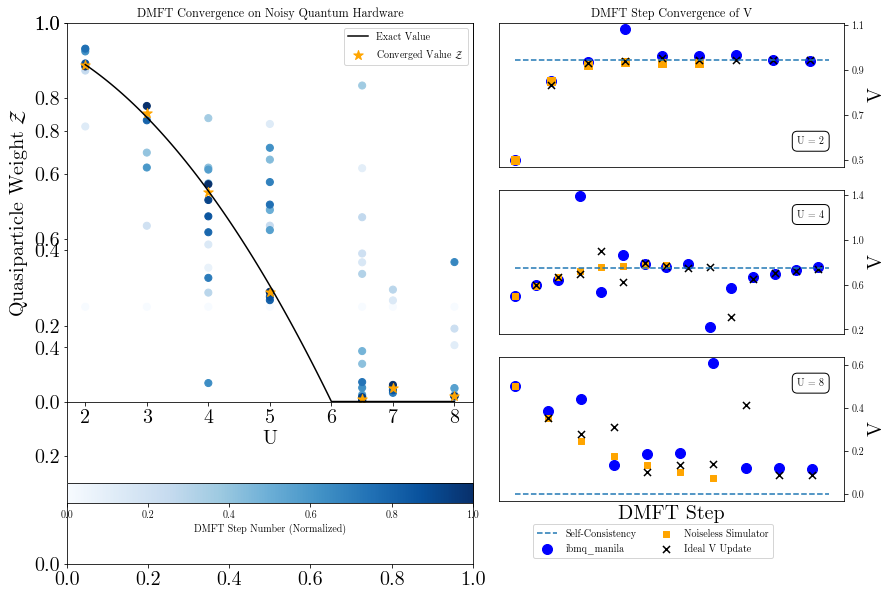

In [ ]:
#Plotting the Converged of U = 4 for Noisy system vs. QASM
U_number = 8
ax_8.clear()
ax_8.get_xaxis().set_ticks([])
ax_8.set_yticks([0, 0.2, 0.4, 0.6])
ax_8.set_xlabel('DMFT Step')
ax_8.yaxis.set_label_position("right")
ax_8.set_ylabel('V')
U4_V_list_qasm = qasm[U_number]['V_List']
U4_V_list_manila = manila[U_number]['V_List']
#ax.fill_between( np.linspace(0, len(U4_V_list_manila)-0.5, 100, endpoint=True), actualV(U_number)-0.02, actualV(U_number)+0.02, alpha=0.5, label='Tolerance')
ax_8.hlines(actualV(U_number), 0, len(U4_V_list_manila)-0.5, linestyles='dashed', label='Self-Consistency')

ax_8.scatter(range(len(U4_V_list_manila)), U4_V_list_manila, s =100,c='b', label='ibmq_manila')

ax_8.scatter(range(len(U4_V_list_qasm)), U4_V_list_qasm, s=30,c='orange',label='Noiseless Simulator', marker='s')
ax_8.scatter(range(1,len(U4_V_list_manila)), ExactIterations(U4_V_list_manila[:-1], U_number), s =50,c='k', marker='x', label='Ideal V Update')
#ax.scatter(range(1,len(U4_V_list_qasm)+1), ExactIterations(U4_V_list_qasm, U_number), s =50,c='orange', marker='x', label='Ideal Value of V (qasm)')
ax_8.legend(loc=(0.1, -0.4), ncol=2)

ax_8.annotate('U = 8', (0.9 * (len(U4_V_list_manila)-0.5), 0.5), 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))
fig_combined.savefig('../../deliverables/paper/Figure_5_testing.png', dpi=300)
fig_combined

In [ ]:
"""def ExactIterations(Uval,V_initial):
    Vstart = V_initial
    tol = 0.02
    v_list = []
    for i in range(10000):
        v_list.append(Vstart)
        omega1 = 0.25*(np.sqrt(Uval**2 + 64*Vstart**2) - np.sqrt(Uval**2 + 16*Vstart**2))
        omega2 = 0.25*(np.sqrt(Uval**2 + 64*Vstart**2) + np.sqrt(Uval**2 + 16*Vstart**2))
        a1 = 0.5*(1 - (Uval**2 - 32*Vstart**2)/(np.sqrt(Uval**2 + 64*Vstart**2)*(Uval**2 + 16*Vstart**2)))
        Z_expected = (omega1**2)*(omega2**2)/(Vstart**2*(omega1**2 + omega2**2 - Vstart**2))

        Vnew = np.sqrt(Z_expected)
        if np.abs(Vstart - Vnew) < tol:
            break
        Vstart = Vnew
    return(v_list)
#print('U = 4')
#ExactIterations(4,0.5)
#print('U = 5')
#ExactIterations(5,0.5)
print('U = 6')
Us = np.linspace(1,8,15,endpoint=True)
v_lists = []
for currentU in Us:
    v_lists.append(ExactIterations(currentU,0.5))"""

"def ExactIterations(Uval,V_initial):\n    Vstart = V_initial\n    tol = 0.02\n    v_list = []\n    for i in range(10000):\n        v_list.append(Vstart)\n        omega1 = 0.25*(np.sqrt(Uval**2 + 64*Vstart**2) - np.sqrt(Uval**2 + 16*Vstart**2))\n        omega2 = 0.25*(np.sqrt(Uval**2 + 64*Vstart**2) + np.sqrt(Uval**2 + 16*Vstart**2))\n        a1 = 0.5*(1 - (Uval**2 - 32*Vstart**2)/(np.sqrt(Uval**2 + 64*Vstart**2)*(Uval**2 + 16*Vstart**2)))\n        Z_expected = (omega1**2)*(omega2**2)/(Vstart**2*(omega1**2 + omega2**2 - Vstart**2))\n\n        Vnew = np.sqrt(Z_expected)\n        if np.abs(Vstart - Vnew) < tol:\n            break\n        Vstart = Vnew\n    return(v_list)\n#print('U = 4')\n#ExactIterations(4,0.5)\n#print('U = 5')\n#ExactIterations(5,0.5)\nprint('U = 6')\nUs = np.linspace(1,8,15,endpoint=True)\nv_lists = []\nfor currentU in Us:\n    v_lists.append(ExactIterations(currentU,0.5))"

In [ ]:
for (v_list,U) in zip(v_lists,Us):
    plt.plot(range(len(v_list)), v_list, label='U = {}'.format(U))
plt.legend()
#plt.yscale('log')
plt.xlabel('Iteration Number')
plt.ylabel('V Value')
plt.title('Converged Values of V with tolerance 0.02, U < 5.5')

NameError: name 'v_lists' is not defined

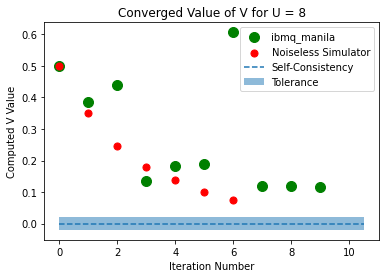

In [ ]:
#Plotting the Converged of U = 4 for Noisy system vs. QASM
U_number = 8
plt.close()
fig, ax = plt.subplots()
ax.set_xlabel('Iteration Number')
ax.set_ylabel('Computed V Value')
ax.set_title('Converged Value of V for U = ' + str(U_number))
U4_V_list_qasm = qasm[U_number]['V_List']
U4_V_list_manila = manila[U_number]['V_List']

ax.scatter(range(len(U4_V_list_manila)), U4_V_list_manila, s =100,c='g', label='ibmq_manila')
ax.scatter(range(len(U4_V_list_qasm)), U4_V_list_qasm, s=50,c='r',label='Noiseless Simulator')
ax.hlines(actualV(U_number), 0, len(U4_V_list_manila)+0.5, linestyles='dashed', label='Self-Consistency')
ax.fill_between( np.linspace(0, len(U4_V_list_manila)+0.5, 100, endpoint=True), actualV(U_number)-0.02, actualV(U_number)+0.02, alpha=0.5, label='Tolerance')
ax.legend()
plt.show()


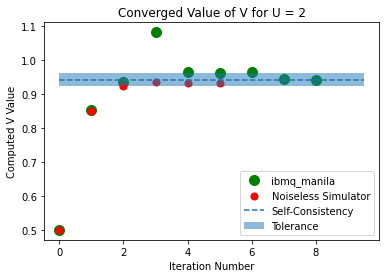

In [ ]:
#Plotting the Converged of U = 4 for Noisy system vs. QASM
U_number = 2
plt.close()
fig, ax = plt.subplots()
ax.set_xlabel('Iteration Number')
ax.set_ylabel('Computed V Value')
ax.set_title('Converged Value of V for U = ' + str(U_number))
U4_V_list_qasm = qasm[U_number]['V_List']
U4_V_list_manila = manila[U_number]['V_List']

ax.scatter(range(len(U4_V_list_manila)), U4_V_list_manila, s =100,c='g', label='ibmq_manila')
ax.scatter(range(len(U4_V_list_qasm)), U4_V_list_qasm, s=50,c='r',label='Noiseless Simulator')
ax.hlines(actualV(U_number), 0, len(U4_V_list_manila)+0.5, linestyles='dashed', label='Self-Consistency')
ax.fill_between( np.linspace(0, len(U4_V_list_manila)+0.5, 100, endpoint=True), actualV(U_number)-0.02, actualV(U_number)+0.02, alpha=0.5, label='Tolerance')
ax.legend()
plt.show()


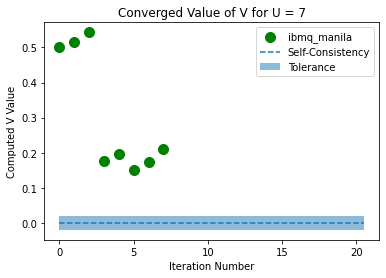

In [ ]:
#Plotting the Converged of U = 4 for Noisy system vs. QASM
U_number = 7
plt.close()
fig, ax = plt.subplots()
ax.set_xlabel('Iteration Number')
ax.set_ylabel('Computed V Value')
ax.set_title('Converged Value of V for U = ' + str(U_number))
#U4_V_list_qasm = qasm[U_number]['V_List']
U4_V_list_manila = manila[U_number]['V_List']

ax.scatter(range(len(U4_V_list_manila)), U4_V_list_manila, s =100,c='g', label='ibmq_manila')
#ax.scatter(range(len(U4_V_list_qasm)), U4_V_list_qasm, s=50,c='r',label='Noiseless Simulator')
ax.hlines(actualV(U_number), 0, 20.5, linestyles='dashed', label='Self-Consistency')
ax.fill_between( np.linspace(0, 20.5, 100, endpoint=True), actualV(U_number)-0.02, actualV(U_number)+0.02, alpha=0.5, label='Tolerance')
ax.legend()
plt.show()


In [ ]:
os.getcwd()
os.chdir('./hubbard-model/project_files/final_DMFT/')

FileNotFoundError: [WinError 3] The system cannot find the path specified: './hubbard-model/project_files/final_DMFT/'